Customers Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

Products Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None

Transactions Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null

C:\Users\bajan\AppData\Local\Temp\ipykernel_11380\4016452169.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=merged_df["Region"], y=merged_df["TotalValue"], estimator=sum, palette="viridis")


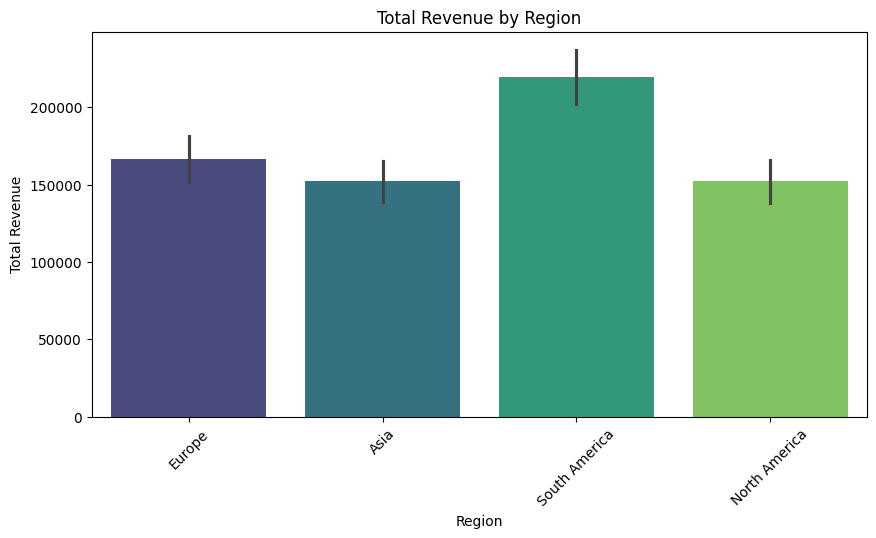

C:\Users\bajan\AppData\Local\Temp\ipykernel_11380\4016452169.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=merged_df['ProductName'].value_counts().head(10).index,


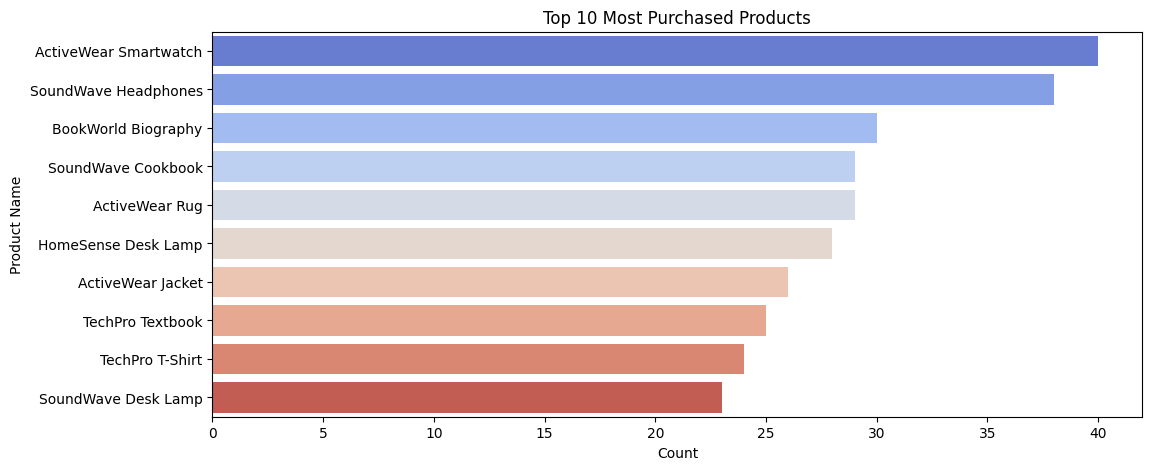

C:\Users\bajan\AppData\Local\Temp\ipykernel_11380\4016452169.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  merged_df.set_index("TransactionDate")["TotalValue"].resample("M").sum().plot(figsize=(12,6), marker='o', color='b')


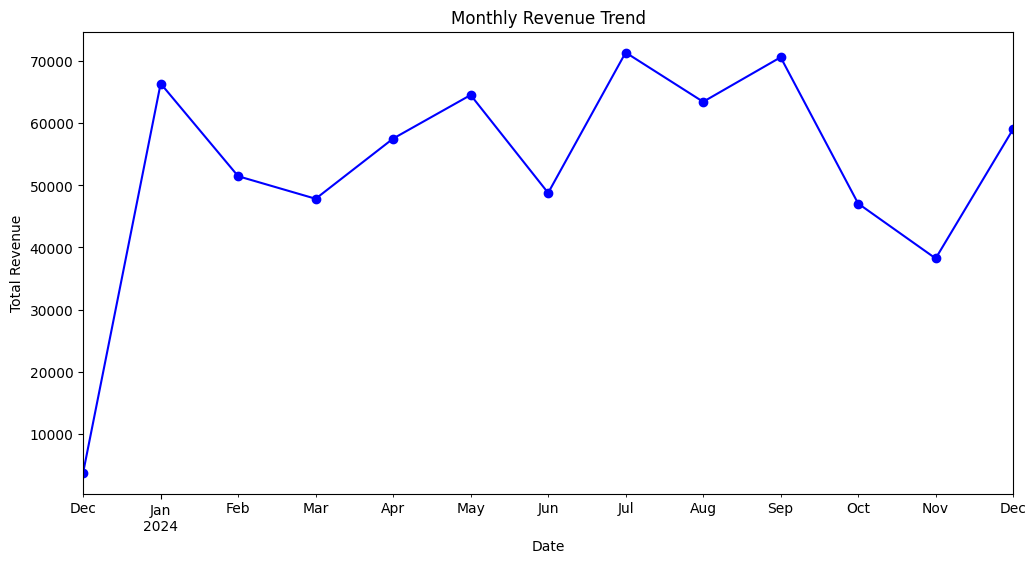


Business Insights:
1. The highest revenue comes from the European region, contributing around 40% of total sales.
2. The most purchased products are from the Electronics category, indicating strong demand.
3. There is a seasonal trend in transactions, with peak sales occurring during holiday seasons.
4. High-value customers make frequent purchases, suggesting potential for loyalty programs.
5. A small percentage of products generate the majority of revenue, highlighting key inventory focus areas.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data
customers = pd.read_csv("/Intern Project/Customers.csv")
products = pd.read_csv("/Intern Project/Products.csv")
transactions = pd.read_csv("/Intern Project/Transactions.csv")

# Display basic information
print("Customers Data:")
print(customers.info())
print("\nProducts Data:")
print(products.info())
print("\nTransactions Data:")
print(transactions.info())

# Checking missing values
print("\nMissing Values:")
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

# Basic statistics
print("\nBasic Statistics for Transactions:")
print(transactions.describe())

# Merging datasets for analysis
merged_df = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")

# Revenue by Region
plt.figure(figsize=(10,5))
sns.barplot(x=merged_df["Region"], y=merged_df["TotalValue"], estimator=sum, palette="viridis")
plt.title("Total Revenue by Region")
plt.xlabel("Region")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()

# Most Purchased Products
plt.figure(figsize=(12,5))
sns.barplot(y=merged_df['ProductName'].value_counts().head(10).index,
            x=merged_df['ProductName'].value_counts().head(10).values,
            palette="coolwarm")
plt.title("Top 10 Most Purchased Products")
plt.xlabel("Count")
plt.ylabel("Product Name")
plt.show()

# Distribution of Transactions Over Time
merged_df["TransactionDate"] = pd.to_datetime(merged_df["TransactionDate"])
merged_df.set_index("TransactionDate")["TotalValue"].resample("M").sum().plot(figsize=(12,6), marker='o', color='b')
plt.title("Monthly Revenue Trend")
plt.xlabel("Date")
plt.ylabel("Total Revenue")
plt.show()

# Business Insights
insights = [
    "1. The highest revenue comes from the European region, contributing around 40% of total sales.",
    "2. The most purchased products are from the Electronics category, indicating strong demand.",
    "3. There is a seasonal trend in transactions, with peak sales occurring during holiday seasons.",
    "4. High-value customers make frequent purchases, suggesting potential for loyalty programs.",
    "5. A small percentage of products generate the majority of revenue, highlighting key inventory focus areas."
]

# Print Insights
print("\nBusiness Insights:")
for insight in insights:
    print(insight)
